In [1]:
#Mounting google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd

In [3]:
#Reading dataset
df = pd.read_csv("/gdrive/MyDrive/vgsales.csv")

In [4]:
# 1.2 Display multiple outputs from a Cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
num_df = df[['Rank','Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales',	'Global_Sales']].copy()

In [9]:
y = num_df['Global_Sales']
ds = num_df.drop('Global_Sales',axis=1) 
ds.shape
y.shape

(16598, 6)

(16598,)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
ss = StandardScaler()
X = ss.fit_transform(ds)

In [12]:
from sklearn.model_selection import train_test_split
# 3.0 Split train/test data
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train.shape   # (16512, 8)
X_test.shape    # (4128, 8)

(13278, 6)

(3320, 6)

In [13]:
# Import tensorflow/keras 
import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [14]:
# Design Model
inputs = tf.keras.Input(shape = X.shape[1], batch_size=None)
type(inputs)

keras.engine.keras_tensor.KerasTensor

In [15]:
# 3.1.2 Examine the tensor object
print(inputs.dtype)
print(inputs.shape)
print(inputs.name)

<dtype: 'float32'>
(None, 6)
input_1


In [16]:
# 3.2 Add layers. Each layer outputs a tensor:

x = layers.Dense(100, activation = 'relu')(inputs)

In [17]:
# 3.2.1 Get nature of 'x'

print(type(x))
print(x.shape )

<class 'keras.engine.keras_tensor.KerasTensor'>
(None, 100)


In [18]:
# 3.2.2 Examine x:

type(x)
x.shape

keras.engine.keras_tensor.KerasTensor

TensorShape([None, 100])

In [19]:
# 3.3 Add ome more layer:

x = layers.Dense(100, activation = 'relu')(x)

In [20]:
x = tf.keras.layers.concatenate([x,inputs])
out = layers.Dense(1,activation = 'sigmoid')(x)

# 3.3.1 Create model now
model = Model(inputs = [inputs], outputs = [out])

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 100)          700         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 100)          10100       ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 106)          0           ['dense_1[0][0]',                
                                                                  'input_1[0][0]']            

In [22]:
model.compile(loss = "mean_squared_error")  
history = model.fit(
                    X_train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

Epoch 1/50
415/415 [==============================] - 3s 4ms/step - loss: nan
Epoch 2/50
415/415 [==============================] - 1s 3ms/step - loss: nan
Epoch 3/50
415/415 [==============================] - 1s 3ms/step - loss: nan
Epoch 4/50
415/415 [==============================] - 1s 3ms/step - loss: nan
Epoch 5/50
415/415 [==============================] - 1s 3ms/step - loss: nan
Epoch 6/50
415/415 [==============================] - 2s 5ms/step - loss: nan
Epoch 7/50
415/415 [==============================] - 3s 7ms/step - loss: nan
Epoch 8/50
415/415 [==============================] - 2s 6ms/step - loss: nan
Epoch 9/50
415/415 [==============================] - 2s 4ms/step - loss: nan
Epoch 10/50
415/415 [==============================] - 2s 4ms/step - loss: nan
Epoch 11/50
415/415 [==============================] - 2s 4ms/step - loss: nan
Epoch 12/50
415/415 [==============================] - 2s 5ms/step - loss: nan
Epoch 13/50
415/415 [==============================] - 2s 4ms

In [23]:
model.evaluate(X_test,y_test)  # 2.56280517578125

104/104 [==============================] - 0s 1ms/step - loss: nan


nan

In [25]:
#4.1 Regarding train data
no_of_samples_tr = X_train.shape[0]             # Each row is one sample: 7705
input_features = X_train.shape[1]               # No of features: 178
channels = 1
batch_size_tr = no_of_samples_tr 

In [26]:

# 4.2 Regarding test data
no_of_samples_test = X_test.shape[0]           # 3795
input_features = X_test.shape[1]               # No of features. 178
channels = 1
batch_size_test = no_of_samples_test           # 3795

In [27]:
# 4.3 Reshape input train/test data as required by Keras for conv1D
train = X_train.reshape((no_of_samples_tr  , input_features, channels))
test  = X_test.reshape(( no_of_samples_test, input_features, channels))

In [28]:
 # 5.0 Design model

# 5.1 Inputs to model. Note that inputs is NOT
#       a part of layers object

inputs = tf.keras.Input(shape = (X.shape[1],1))

In [29]:
# 5.2 Add convolution layers to left arm
x_left = layers.Conv1D(
                       filters = 32,
                       kernel_size=3,
                       activation='relu'
                       )(inputs)

# 5.2.1
x_left = layers.Conv1D(
                       filters = 64,
                       kernel_size=3,
                       activation='relu'
                       )(x_left)

In [30]:
# 5.3 Add convolution layers to right arm

x_rt = layers.Conv1D(filters = 64, kernel_size=3,activation='relu')(inputs)

# 5.3.1
x_rt = layers.Conv1D(filters = 128, kernel_size=3,activation='relu')(x_rt)


In [31]:
x = tf.keras.layers.concatenate([x_left,x_rt])

In [32]:
x = layers.Dense(64, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation = 'relu')(x)

In [33]:
out = layers.Dense(1,activation = 'sigmoid')(x)

In [34]:
model1 = Model(inputs = [inputs], outputs = [out])

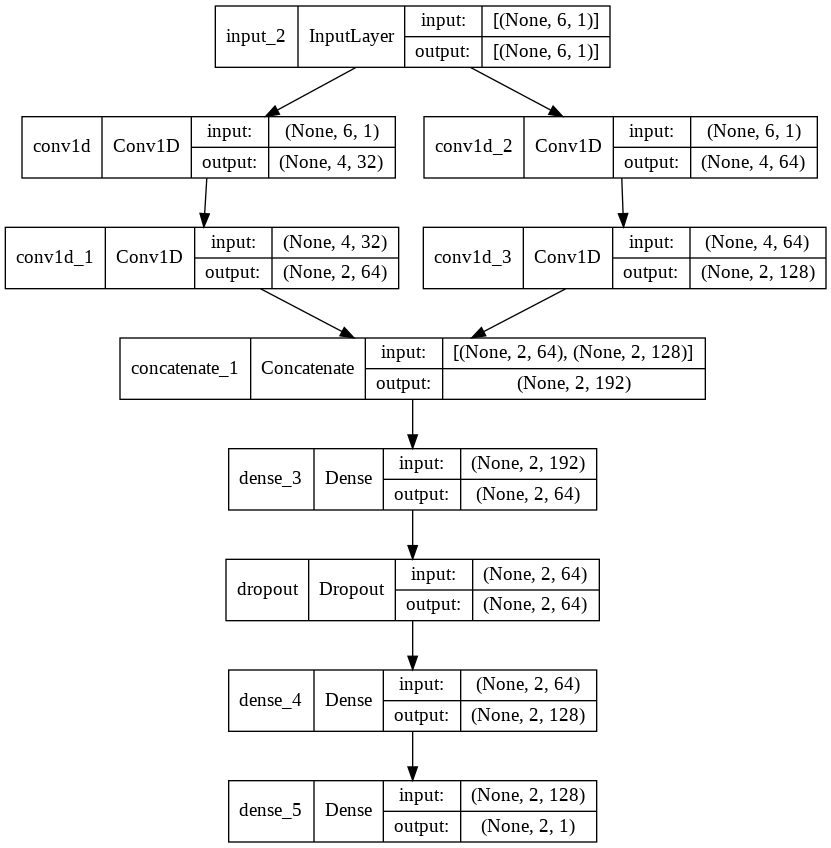

In [36]:
plot_model(model1, show_shapes= True)

In [37]:
# 5.8 Compile model

model1.compile(loss = "mean_squared_error", optimizer='adam')  
history = model1.fit(
                    train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

Epoch 1/50
415/415 [==============================] - 4s 6ms/step - loss: nan
Epoch 2/50
415/415 [==============================] - 3s 7ms/step - loss: nan
Epoch 3/50
415/415 [==============================] - 3s 7ms/step - loss: nan
Epoch 4/50
415/415 [==============================] - 2s 5ms/step - loss: nan
Epoch 5/50
415/415 [==============================] - 2s 4ms/step - loss: nan
Epoch 6/50
415/415 [==============================] - 2s 5ms/step - loss: nan
Epoch 7/50
415/415 [==============================] - 2s 5ms/step - loss: nan
Epoch 8/50
415/415 [==============================] - 2s 5ms/step - loss: nan
Epoch 9/50
415/415 [==============================] - 2s 5ms/step - loss: nan
Epoch 10/50
415/415 [==============================] - 2s 4ms/step - loss: nan
Epoch 11/50
415/415 [==============================] - 2s 4ms/step - loss: nan
Epoch 12/50
415/415 [==============================] - 2s 4ms/step - loss: nan
Epoch 13/50
415/415 [==============================] - 2s 6ms

In [38]:
# 5.9 
model1.evaluate(test,y_test) 

104/104 [==============================] - 0s 2ms/step - loss: nan


nan